In [21]:
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

In [2]:
# Загрузка данных из файла.
data = np.loadtxt('Data.csv', delimiter=' ') 
print(data)

[[ 0.14901425  0.09722519 -0.42461122  0.07514786  0.10733621]
 [-0.04147929 -0.11552468 -0.1261936   0.10393446  0.16823536]
 [ 0.19430656 -0.2030766  -0.10281435 -0.20400742  0.32491537]
 ...
 [ 4.91291764  5.28029597  4.70851579  5.17590921  5.36250987]
 [ 5.08021769  4.58993639  5.36012417  5.37148492  5.30721876]
 [ 5.09650934  4.93257038  4.80293172  5.00638147  5.17775808]]


In [3]:
# Определяем оптимальное количество кластеров (взяла метод Локтя)
distortions = []
K = range(1, 10)

In [4]:
for k in K:
    kmeans_model = KMeans(n_clusters=k, random_state=42).fit(data)
    distortions.append(kmeans_model.inertia_)

C:\Users\AGSR\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


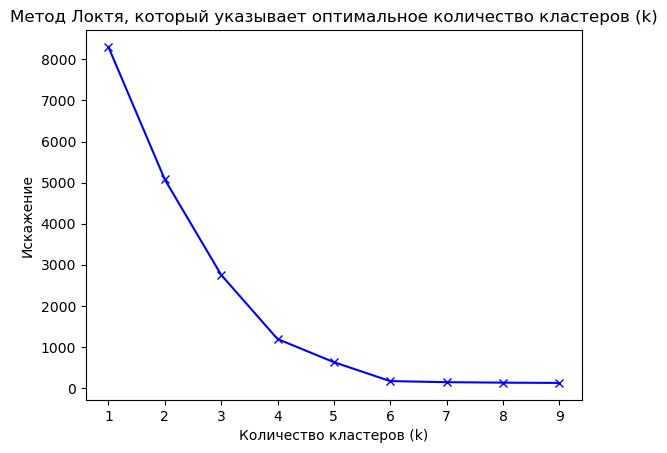

In [5]:
# рисуем график
# исходя из графика видно, что оптимальным количеством кластеров (k) является - 6 класстеров 
# (выбирается количество кластеров, при котором значение искажения перестает существенно уменьшаться). 
plt.plot(K, distortions, 'bx-')
plt.xlabel('Количество кластеров (k)')
plt.ylabel('Искажение')
plt.title('Метод Локтя, который указывает оптимальное количество кластеров (k)')
plt.show()

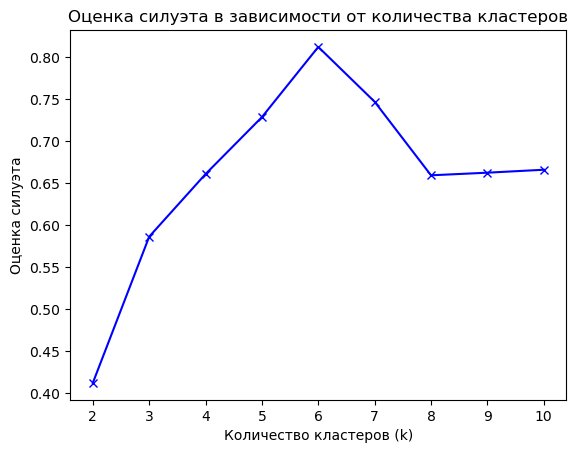

In [6]:
# cтроим график метрики "силуэт" от количества кластеров в диапазоне от 2 до 10,
# здесь на графике также видим, что оптимальным количеством кластеров является k=6.
# Метрика "силуэт" показывает, насколько хорошо объекты в кластерах сгруппированы относительно объектов из других кластеров, 
# и значения близкие к 1 указывают на хорошее разбиение на кластеры

silhouette_scores = []
K = range(2, 11)
for k in K:
    kmeans_model = KMeans(n_clusters=k, random_state=42)
    clusters = kmeans_model.fit_predict(data)
    score = silhouette_score(data, clusters)
    silhouette_scores.append(score)

plt.plot(K, silhouette_scores, 'bx-')
plt.xlabel('Количество кластеров (k)')
plt.ylabel('Оценка силуэта')
plt.title('Оценка силуэта в зависимости от количества кластеров')
plt.show()

In [ ]:
# Исходя из этих двух методов делаем вывод, что оптимальным количеством кластеров в данном задании является k=6 (6 кластеров)

In [ ]:
# Cтроим оптимальное разбиение на кластеры

In [7]:
# Создаем экземпляр модели KMeans с 6 кластерами и обучаем ее на наших данных
kmeans_model = KMeans(n_clusters=6, random_state=42).fit(data)

In [8]:
# Получаем метки кластеров для каждой точки данных
labels = kmeans_model.predict(data)

In [9]:
# Выводим метки кластеров
print(labels)

[5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5
 5 5 5 5 5 5 5 5 5 5 5 5 5 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 4 4 4 4 4 4 4 4 4
 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4
 4 4 4 4]


In [10]:
# Создаем отдельные массивы для каждого кластера
cluster0 = data[labels == 0]
cluster1 = data[labels == 1]
cluster2 = data[labels == 2]
cluster3 = data[labels == 3]
cluster4 = data[labels == 4]
cluster5 = data[labels == 5]

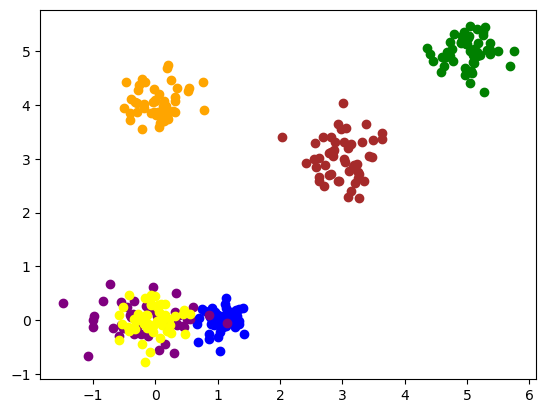

In [11]:
# Рисуем график для каждого кластера
colors = ['orange', 'brown', 'blue', 'purple', 'green', 'yellow']
plt.scatter(cluster0[:, 0], cluster0[:, 1], color='orange', label='Cluster 0')
plt.scatter(cluster1[:, 0], cluster1[:, 1], color='brown', label='Cluster 1')
plt.scatter(cluster2[:, 0], cluster2[:, 1], color='blue', label='Cluster 2')
plt.scatter(cluster3[:, 0], cluster3[:, 1], color='purple', label='Cluster 3')
plt.scatter(cluster4[:, 0], cluster4[:, 1], color='green', label='Cluster 4')
plt.scatter(cluster5[:, 0], cluster5[:, 1], color='yellow', label='Cluster 5')

In [12]:
# теперь для наглядности используем метод t-SNE из библиотеки scikit-learn 
# для визуализации нашего набора данных в двумерном пространстве 
# (т.е. перерисуем наш график с точками и нарисуем точки тем же цветами)

In [17]:
# Применяем метод t-SNE для снижения размерности до 2
tsne = TSNE(n_components=2)
X_tsne = tsne.fit_transform(data)

C:\Users\AGSR\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
C:\Users\AGSR\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


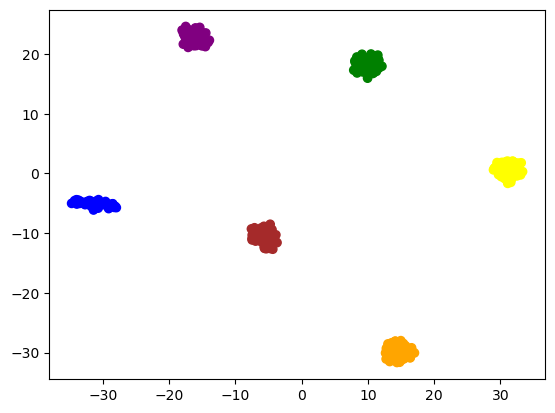

In [24]:
# Визуализируем кластеры в двумерном пространстве (нарисуем точки тем же цветом, что и на графике выше)
plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=labels, cmap=ListedColormap(colors))
plt.show()

In [119]:
# Построение оптимального разбиения на кластеры (k=6)
kmeans = KMeans(n_clusters=6, random_state=10)
kmeans.fit(data)

KMeans(n_clusters=6, random_state=10)

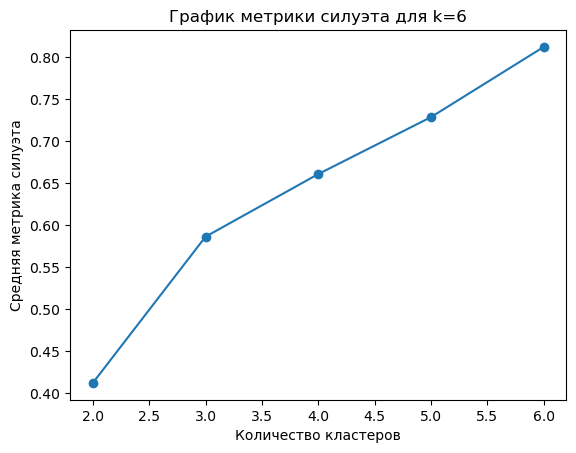

In [120]:
# Построение графика метрики силуэт
plt.plot(range_n_clusters, silhouette_scores, '-o')
plt.xlabel('Количество кластеров')
plt.ylabel('Средняя метрика силуэта')
plt.title('График метрики силуэта для k=6')
plt.show()

In [184]:
# Спрогнозировать классы для новых векторов

# Создаем объект KMeans с количеством кластеров равным 6
kmeans_model = KMeans(n_clusters=6, random_state=42)

# Обучаем модель на данных data
kmeans_model.fit(data)

# Создаем два новых вектора
new_vectors = [[-0.1805, -0.0659, -0.465199, 0.187700, -0.21910998], 
               [0.2226875, -0.133287, 2.8845, 3.2772081, 2.93884]]

predicted_classes = kmeans_model.predict(new_vectors)

# Выводим прогнозируемые классы
print(predicted_classes)


[5 3]
